<a href="https://colab.research.google.com/github/vladeviste/mat230/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The accompanying code for Chapter 1 and 2
This Jupyter file contains the Python scripts accompanying Stephen Lynch's book Dynamical Systems with Applications using Python.

## Program 01a: Solve a simple ODE.

The first solves

$$ x'(t)=\frac{d x(t)}{d t} = 1-x(t) $$

In [ ]:
from sympy import dsolve, Eq, symbols, Function

t = symbols('t')
x = symbols('x', cls=Function)

deqn1 = Eq(x(t).diff(t), 1-x(t))
sol1 = dsolve(deqn1, x(t))

pprint(sol1)

           -t    
x(t) = C₁⋅ℯ   + 1


## Program 01b: A program that solves a second order ODE.
This solves a second order equation
$$ y''(t)+y'(t)+y(t)=e^{t}$$

Experiment with other right hand sides. Is this quicker than solving by hand?

In [ ]:
from sympy import Function, Eq, dsolve, symbols, exp
t = symbols('t')
y = symbols('y', cls=Function)

deqn2 = Eq(y(t).diff(t, t) + y(t).diff(t) + y(t), exp(t))
sol2 = dsolve(deqn2, y(t))

print(sol2)

Eq(y(t), (C1*sin(sqrt(3)*t/2) + C2*cos(sqrt(3)*t/2))*exp(-t/2) + exp(t)/3)


## Program 02a: A separabale ODE.
See Example 1.
Solving
$$ x'(t)=-\frac{t}{x(t)} $$
It has two solutions, can you access one of them?

In [ ]:

from sympy import symbols, Function, Eq, dsolve

t = symbols('t')
x = symbols('x', cls=Function)
sol3 = dsolve(Eq(x(t).diff(t), -t/x(t)), x(t))

pprint(sol3)

⎡           _________            _________⎤
⎢          ╱       2            ╱       2 ⎥
⎣x(t) = -╲╱  C₁ - t  , x(t) = ╲╱  C₁ - t  ⎦


## Program 02b: the logistic equation.
See Example 13.
$$ \frac{d}{dt}P(t)=P(t)(a-bP(t))$$


In [ ]:

from sympy import symbols, Function, Eq, dsolve

t = symbols('t')
a = symbols('a')
b = symbols('b')
P = symbols('P', cls=Function)

sol4 = dsolve(Eq(P(t).diff(t), P(t) * (a-b * P(t))), P(t))

print(sol4)
sol4

Eq(P(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))


Eq(P(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))

In [ ]:
from sympy import limit, oo
sol4.rhs

a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1))

### Case 1: `a` is positive

In [ ]:
from sympy import symbols, Function, Eq, dsolve, exp, limit, oo

t = symbols('t')
# Define 'a' with an assumption that it's positive
a_pos = symbols('a', positive=True)
b = symbols('b')
P = symbols('P', cls=Function)

# Solve the ODE with a_pos
sol4_pos = dsolve(Eq(P(t).diff(t), P(t) * (a_pos - b * P(t))), P(t))

# Calculate the limit as t approaches infinity
limit_pos = limit(sol4_pos.rhs, t, oo)

print(f"Solution for a > 0: {sol4_pos}")
print(f"Limit as t->oo for a > 0: {limit_pos}")

### Case 2: `a` is negative

In [ ]:
from sympy import symbols, Function, Eq, dsolve, exp, limit, oo

t = symbols('t')
# Define 'a' with an assumption that it's negative
a_neg = symbols('a', negative=True)
b = symbols('b')
P = symbols('P', cls=Function)

# Solve the ODE with a_neg
sol4_neg = dsolve(Eq(P(t).diff(t), P(t) * (a_neg - b * P(t))), P(t))

# Calculate the limit as t approaches infinity
limit_neg = limit(sol4_neg.rhs, t, oo)

print(f"Solution for a < 0: {sol4_neg}")
print(f"Limit as t->oo for a < 0: {limit_neg}")

### Case 3: `a` is zero

In [ ]:
from sympy import symbols, Function, Eq, dsolve, exp, limit, oo

t = symbols('t')
# For a = 0, the original equation becomes P'(t) = P(t) * (0 - b*P(t)) = -b*P(t)^2
# We can substitute a=0 into the original differential equation and solve it.
# Alternatively, we can substitute a=0 into the solution if it doesn't lead to indeterminate forms.

# Re-solve the ODE with a=0 directly
a_zero = 0 # Substitute a = 0 directly into the ODE
b = symbols('b')
P = symbols('P', cls=Function)

sol4_zero = dsolve(Eq(P(t).diff(t), P(t) * (a_zero - b * P(t))), P(t))

# Calculate the limit as t approaches infinity
limit_zero = limit(sol4_zero.rhs, t, oo)

print(f"Solution for a = 0: {sol4_zero}")
print(f"Limit as t->oo for a = 0: {limit_zero}")

Solution for a = 0: Eq(P(t), 1/(C1 + b*t))
Limit as t->oo for a = 0: 0


## Program 02c : Power series solution first order ODE.
See Example 7.

Notice the use of _pprint_.

In [ ]:

from sympy import dsolve, Function, pprint
from sympy.abc import t

x = Function('x')
ODE1 = x(t).diff(t) + t * x(t) - t**3
pprint(dsolve(ODE1, hint='1st_power_series', n=8, ics={x(0): 1}))


            2      4    6        
           t    3⋅t    t     ⎛ 8⎞
x(t) = 1 - ── + ──── - ── + O⎝t ⎠
           2     8     16        


## Program 01c: Two curves on one plot.

See Figure 1.14.


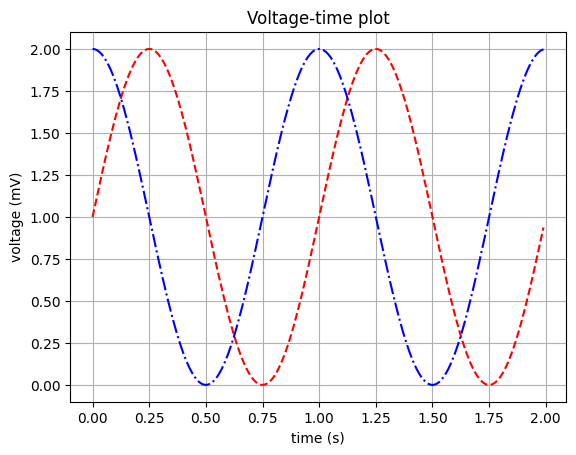

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

#t. np.arange(start, stop, step) generates evenly spaced values within a given interval.
t = np.arange(0.0, 2.0, 0.01)
c = 1 + np.cos(2*np.pi*t)
s = 1 + np.sin(2*np.pi*t)

plt.plot(t, s, 'r--', t, c, 'b-.')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Voltage-time plot')
plt.grid(True)
plt.savefig('Voltage-Time Plot.png')
plt.show()


## Program 01d: Subplots.
See Figure 1.15.



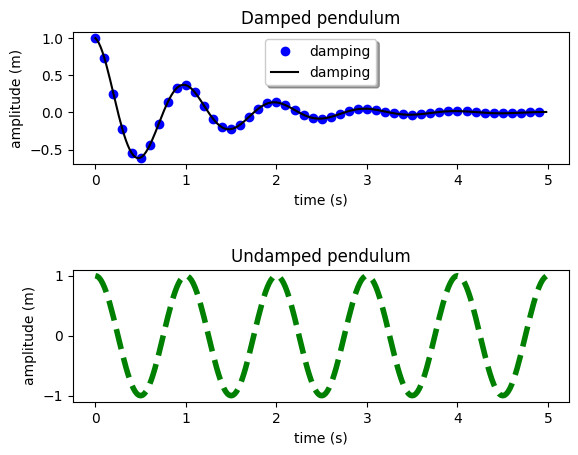

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)  # subplot(num rows, num cols, fig num)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k', label='damping')
plt.xlabel('time (s)')
plt.ylabel('amplitude (m)')
plt.title('Damped pendulum')
legend = plt.legend(loc='upper center', shadow=True)

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'g--', linewidth=4)
plt.xlabel('time (s)')
plt.ylabel('amplitude (m)')
plt.title('Undamped pendulum')
plt.subplots_adjust(hspace=0.8)

plt.show()


## Program 01e: Surface and contour plots.
See Figure 1.16.


<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3888606549.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi_p$', fontsize=15)
/tmp/ipython-input-3888606549.py:29: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('$\phi_m$', fontsize=15)


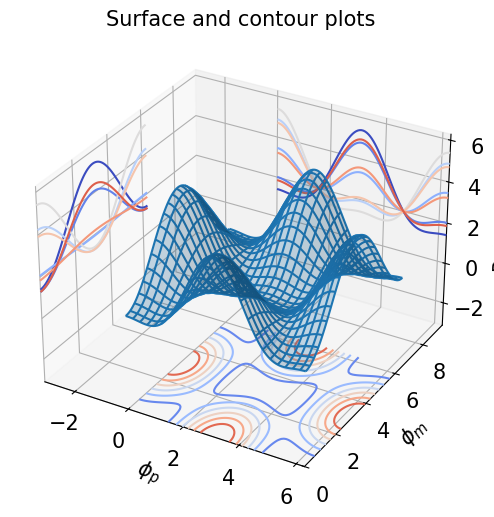

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha=0.7
phi_ext=2*np.pi*0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2*np.cos(phi_p) * np.cos(phi_m) - alpha*np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z,zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z,zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z,zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);
ax.set_xlabel('$\phi_p$', fontsize=15)
ax.set_ylabel('$\phi_m$', fontsize=15)
ax.set_zlabel('Potential', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Surface and contour plots', fontsize=15)
plt.show()


## Program 01f: Parametric curve in 3D.
See Figure 1.17.


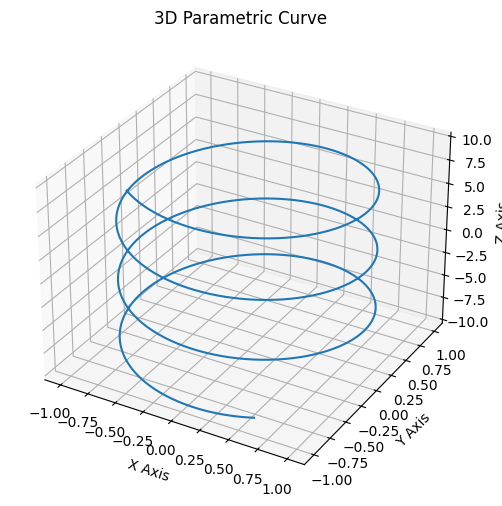

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

t = np.linspace(-10, 10, 1000)
x = np.sin(t)
y = np.cos(t)
z = t
ax.plot(x, y, z)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Parametric Curve')

plt.show()


# Exercises
1. For Program 1a-1d, can you find the integrating constants given initial conditions?
2. Plot the solutions.